<a href="https://colab.research.google.com/github/naoya1110/covid19-japan-7days-average/blob/main/covid19_jpn_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [2]:
os.system("apt install subversion")
os.system("svn export https://github.com/CSSEGISandData/COVID-19/trunk/csse_covid_19_data/csse_covid_19_daily_reports")

0

In [82]:
DATA = "csse_covid_19_daily_reports"
filenames = sorted(os.listdir(DATA))

date_list = []

for filename in filenames:
    if ".csv" in filename:
        date_list.append(datetime.strptime(filename, '%m-%d-%Y.csv'))

date_list = sorted(date_list)
print(len(date_list))

598


In [83]:
pref_dict = {
            'Aichi': 74.83,
            'Akita': 10.23,
            'Aomori': 13.08,
            'Chiba': 62.23,
            'Ehime': 13.85,
            'Fukui': 7.87, 
            'Fukuoka': 54.54, 
            'Fukushima': 9.14, 
            'Gifu': 20.32, 
            'Gunma': 19.73, 
            'Hiroshima': 28.44, 
            'Hokkaido': 53.81, 
            'Hyogo': 55.35, 
            'Ibaraki': 29.17, 
            'Ishikawa': 11.54, 
            'Iwate': 12.80, 
            'Kagawa': 9.76, 
            'Kagoshima': 16.48, 
            'Kanagawa': 91.26, 
            'Kochi': 7.28, 
            'Kumamoto': 17.86, 
            'Kyoto': 26.10, 
            'Mie': 18.16, 
            'Miyagi': 23.34, 
            'Miyazaki': 11.04, 
            'Nagano': 20.99, 
            'Nagasaki': 13.77, 
            'Nara': 13.64, 
            'Niigata': 23.04, 
            'Oita': 11.66, 
            'Okayama': 19.21, 
            'Okinawa': 14.33, 
            'Osaka': 88.39, 
            'Saga': 8.33, 
            'Saitama': 72.67, 
            'Shiga': 14.13, 
            'Shimane': 6.94, 
            'Shizuoka': 37.00, 
            'Tochigi': 19.74, 
            'Tokushima': 7.56, 
            'Tokyo': 135.15, 
            'Tottori': 5.73, 
            'Toyama': 10.66, 
            'Wakayama': 9.64, 
            'Yamagata': 11.24, 
            'Yamaguchi': 14.05, 
            'Yamanashi': 8.35 
            }

prefectures = list(pref_dict.keys())

In [106]:
pref_dict = {
            'Hokkaido': 53.81, 
            'Aomori': 13.08,
            'Iwate': 12.80, 
            'Miyagi': 23.34,              
            'Akita': 10.23,
            'Yamagata': 11.24,
            'Fukushima': 9.14,             
            'Ibaraki': 29.17,
            'Tochigi': 19.74,
            'Gunma': 19.73,              
            'Saitama': 72.67, 
            'Chiba': 62.23,
            'Tokyo': 135.15,
            'Kanagawa': 91.26,
            'Niigata': 23.04,             
            'Toyama': 10.66,
            'Ishikawa': 11.54,             
            'Fukui': 7.87, 
            'Yamanashi': 8.35,             
            'Nagano': 20.99, 
            'Gifu': 20.32,
            'Shizuoka': 37.00,           
            'Aichi': 74.83,
            'Mie': 18.16,
            'Shiga': 14.13, 
            'Kyoto': 26.10, 
            'Osaka': 88.39,
            'Hyogo': 55.35, 
            'Nara': 13.64, 
            'Wakayama': 9.64, 
            'Tottori': 5.73,
            'Shimane': 6.94,              
            'Okayama': 19.21,
            'Hiroshima': 28.44, 
            'Yamaguchi': 14.05, 
            'Tokushima': 7.56,              
            'Kagawa': 9.76, 
            'Ehime': 13.85,
            'Kochi': 7.28, 
            'Fukuoka': 54.54, 
            'Saga': 8.33,
            'Nagasaki': 13.77, 
            'Kumamoto': 17.86, 
            'Oita': 11.66, 
            'Miyazaki': 11.04,
            'Kagoshima': 16.48, 
            'Okinawa': 14.33, 
            }

prefectures = list(pref_dict.keys())

In [107]:
confirmed_daily_list = []

for date in tqdm(date_list):
    filename = date.strftime('%m-%d-%Y.csv')
    df = pd.read_csv(os.path.join(DATA, filename))

    for provice_column_name in ["Province_State", "Province State", "Province/State"]:
        if provice_column_name in df.columns:
            break


    confirmed_list = []

    for prefecture in prefectures:
        try:
            confirmed = int(df[df[provice_column_name]==prefecture]["Confirmed"])
        except:
            confirmed = 0
        #print(prefecture, confirmed)
        confirmed_list.append(confirmed)
    
    confirmed_daily_list.append(confirmed_list)

df_confirmed = pd.DataFrame(confirmed_daily_list)
df_confirmed.columns = prefectures
df_confirmed.insert(loc = 0, column= 'date', value= date_list)
df_confirmed

  0%|          | 0/598 [00:00<?, ?it/s]

,date,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2021-09-06,58288,4805,3249,15374,1696,3354,9022,22022,13969,15670,106736,93222,357631,157222,7094,4596,7460,2715,4731,8183,16707,24520,93437,13524,11399,32610,181643,70285,14166,4888,1544,1471,14292,19949,5268,2912,4475,4808,3791,69323,5468,5565,13343,7514,5753,8543,45456
594,2021-09-07,58425,4865,3271,15447,1706,3368,9088,22147,14065,15758,107383,93870,359260,157960,7137,4617,7485,2740,4772,8213,16907,24733,94655,13644,11484,32901,183292,70905,14282,4930,1552,1491,14354,20085,5299,2942,4501,4830,3828,69747,5496,5612,13460,7569,5799,8599,45839
595,2021-09-08,58605,4937,3293,15527,1722,3393,9129,22353,14175,15875,108162,94480,361094,159059,7194,4639,7503,2756,4808,8250,17085,24953,95945,13755,11556,33282,185304,71757,14421,4962,1566,1505,14467,20235,5329,2970,4522,4856,3865,70319,5526,5664,13554,7617,5841,8652,46252
596,2021-09-09,58749,5011,3321,15597,1739,3411,9175,22536,14279,15947,108859,95071,362769,159863,7262,4653,7531,2784,4839,8282,17214,25126,97115,13884,11623,33552,186792,72433,14507,4983,1579,1514,14539,20381,5358,3010,4539,4894,3905,70748,5550,5697,13640,7667,5871,8702,46588


In [108]:
def do_analysis(prefecture="Kagawa", population=9.454):
    difference_list = []
    data = df_confirmed[prefecture]

    for i in range(len(date_list)-1):
        difference = data[i+1] - data[i]
        difference_list.append(difference)

    moving_ave_list = []

    for i in range(len(date_list)-7):
        ave = np.mean(difference_list[i:i+7])
        moving_ave_list.append(ave)

    moving_ave_per_population = np.array(moving_ave_list)/population

    return moving_ave_per_population

In [109]:
xticks = []
xtick_labels = []
for date in date_list:
    if date.strftime('%d')=="01" and int(date.strftime("%m"))%3==1:
        xticks.append(date)
        xtick_labels.append(int(date.strftime("%m")))

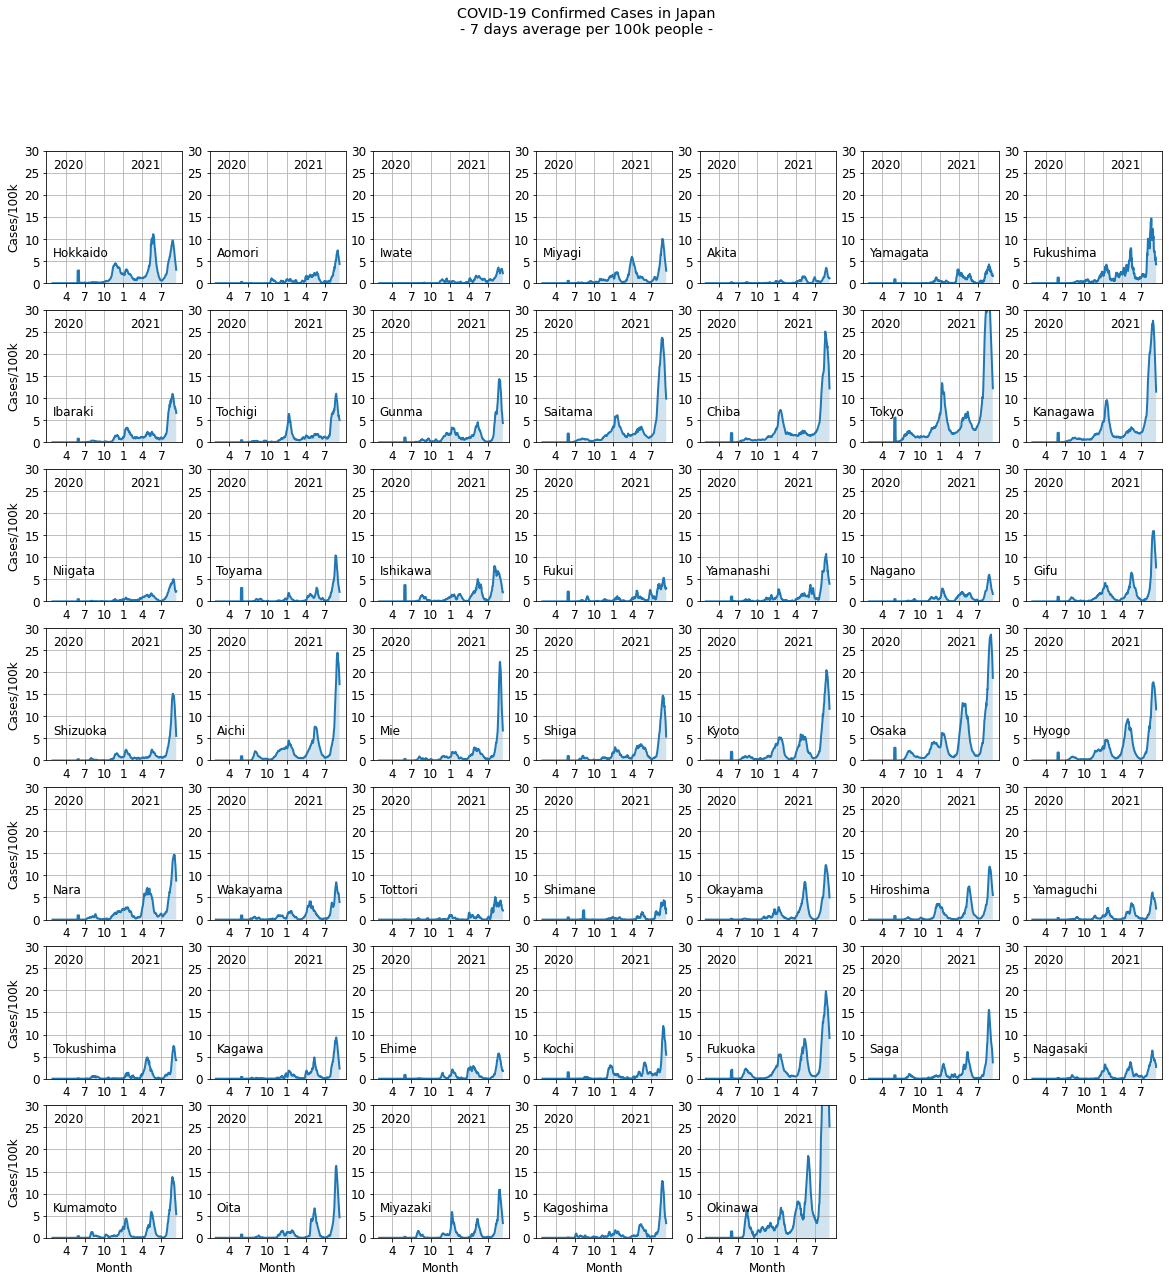

In [115]:
plt.figure(figsize=(20, 20))
plt.rcParams["font.size"]=12

for i, prefecture in enumerate(prefectures):
    population = pref_dict[prefecture]

    moving_ave = do_analysis(prefecture=prefecture, population=population)

    plt.subplot(7, 7, i+1)
    plt.fill_between(date_list[7:], 0, moving_ave, label=prefecture, alpha=0.2)
    plt.plot(date_list[7:], moving_ave, label=prefecture, lw=2)
    plt.xticks(xticks, xtick_labels)
    plt.ylim(0, 30)
    plt.yticks(np.arange(0, 30.1, 5))
    plt.grid()
    plt.text(datetime.strptime("202002", "%Y%m"), 6, prefecture)
    plt.text(datetime.strptime("202002", "%Y%m"), 26, "2020")
    plt.text(datetime.strptime("202102", "%Y%m"), 26, "2021")
    plt.suptitle("COVID-19 Confirmed Cases in Japan\n- 7 days average per 100k people -")
    if i%7==0:
        plt.ylabel("Cases/100k")
    if i>=40:
        plt.xlabel("Month")